# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier


# Read data

In [203]:
df = pd.read_csv('student_data.csv')

## Check for duplicates

In [32]:
df.ID.nunique()

23999

In [33]:
df.ID.size

23999

In [3]:
df.drop(columns = ['ID'], inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,350000,1,1,2,37,-2,-2,-2,-2,-2,...,466,466,316,316,316,466,466,316,316,0
1,50000,2,2,1,37,2,2,2,0,0,...,13026,13268,13497,5500,0,580,600,600,600,0
2,50000,2,1,2,23,-1,-1,-1,-1,-1,...,4800,9810,660,2548,2321,4800,9810,660,2980,0
3,20000,1,3,1,56,0,0,0,0,2,...,13784,13420,13686,1508,1216,1116,0,490,658,0
4,110000,2,2,2,32,0,0,0,0,0,...,108829,110557,106082,5400,5400,4100,4100,4100,4200,0


In [4]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## Preview data

In [5]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,350000,1,1,2,37,-2,-2,-2,-2,-2,...,466,466,316,316,316,466,466,316,316,0
1,50000,2,2,1,37,2,2,2,0,0,...,13026,13268,13497,5500,0,580,600,600,600,0
2,50000,2,1,2,23,-1,-1,-1,-1,-1,...,4800,9810,660,2548,2321,4800,9810,660,2980,0
3,20000,1,3,1,56,0,0,0,0,2,...,13784,13420,13686,1508,1216,1116,0,490,658,0
4,110000,2,2,2,32,0,0,0,0,0,...,108829,110557,106082,5400,5400,4100,4100,4100,4200,0


In [6]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
target = df['default payment next month']

In [8]:
inputs = df.columns.drop('default payment next month')
inputs

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

# EDA

## Check for missing values

In [9]:
df.isna().sum(); # None missing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a203fd750>]],
      dtype=object)

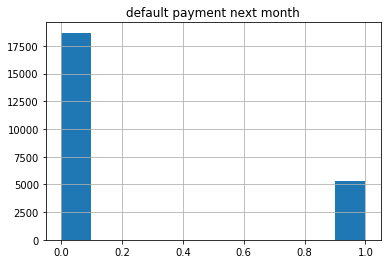

In [10]:
df.hist(column = 'default payment next month')

In [11]:
df['default payment next month'].value_counts()

0    18691
1     5308
Name: default payment next month, dtype: int64

In [42]:
5308/18691 # % of people who default

0.28398694558878607

In [24]:
df.groupby('EDUCATION')['default payment next month'].value_counts()

EDUCATION  default payment next month
0          0                               11
1          0                             6826
           1                             1616
2          0                             8532
           1                             2656
3          0                             2982
           1                             1012
4          0                               95
           1                                5
5          0                              209
           1                               14
6          0                               36
           1                                5
Name: default payment next month, dtype: int64

# Split Data

In [204]:
x_train, x_test, y_train, y_test = train_test_split(df[inputs], target, test_size = 0.2, random_state = 10)

(df['BILL_AMT4'] - df['PAY_AMT4']).value_counts()

In [205]:
y_train.isnull().sum()
len(y_train)

19199

# Upsampling

In [206]:
from sklearn.utils import resample

In [207]:
x_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
10140,40000,2,3,2,24,-1,2,-1,-1,0,...,400,25289,24435,2201,0,400,25289,0,0,1329
13804,70000,1,3,1,45,0,0,0,0,0,...,52567,42743,43894,45051,3067,3000,3000,2000,2000,2000
1962,300000,1,1,2,32,-1,-1,-1,-1,-1,...,2431,2198,14487,725,2085,2431,2198,14487,725,7818
13153,40000,2,2,1,32,0,0,0,2,2,...,28777,29107,29693,30456,2000,4110,1100,1200,1400,0
18037,50000,2,2,2,30,-1,-1,-1,0,0,...,4149,2766,1383,1383,1383,4149,0,0,1383,5419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,140000,1,1,2,37,-1,-1,-1,-1,-1,...,291,291,291,441,291,291,291,291,441,291
7291,220000,2,3,2,40,0,0,0,2,0,...,178594,174330,179525,184562,6500,15000,0,8000,8000,15000
17728,240000,1,2,1,62,-1,-1,0,0,-1,...,3802,1901,2165,1965,3855,1901,0,2165,0,108
7293,400000,2,1,2,41,-1,-1,-1,0,-1,...,43775,10644,42195,12246,27703,43947,10183,42195,12246,13663


In [208]:
defaulted = x_train[y_train == 1]
defaulted = pd.DataFrame(defaulted, columns = list(inputs))
defaulted['target'] = 1
defaulted

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
23458,150000,2,1,2,27,2,2,2,2,0,...,18020,18726,19414,3000,1000,0,1000,1000,1000,1
19521,20000,1,2,2,28,2,2,2,2,2,...,13729,14706,14320,0,2500,0,1200,0,1500,1
21908,200000,1,2,2,29,2,2,4,4,4,...,2500,2500,2500,0,0,0,0,0,0,1
20000,20000,1,3,2,46,2,3,2,2,2,...,9705,10540,10825,0,1200,0,1000,600,0,1
21463,100000,2,2,2,37,0,0,0,0,0,...,11353,9306,9693,3082,2022,1000,1000,500,300,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22543,80000,1,3,1,38,-1,-1,2,0,-1,...,1261,2705,1261,19421,0,0,2705,0,1261,1
20875,320000,2,2,2,26,1,3,2,2,2,...,316898,310361,312581,8100,0,24100,0,11700,12000,1
18827,180000,2,2,2,36,0,0,0,0,0,...,156584,166960,164012,7000,7100,6000,13100,0,6000,1
20836,50000,1,3,1,51,2,0,0,0,0,...,19867,20154,18732,3000,1600,1000,1000,1000,1000,1


In [209]:
not_defaulted = x_train[y_train == 0]
not_defaulted = pd.DataFrame(not_defaulted, columns = list(inputs))
not_defaulted['target'] = 0
not_defaulted

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
10140,40000,2,3,2,24,-1,2,-1,-1,0,...,25289,24435,2201,0,400,25289,0,0,1329,0
13804,70000,1,3,1,45,0,0,0,0,0,...,42743,43894,45051,3067,3000,3000,2000,2000,2000,0
1962,300000,1,1,2,32,-1,-1,-1,-1,-1,...,2198,14487,725,2085,2431,2198,14487,725,7818,0
13153,40000,2,2,1,32,0,0,0,2,2,...,29107,29693,30456,2000,4110,1100,1200,1400,0,0
18037,50000,2,2,2,30,-1,-1,-1,0,0,...,2766,1383,1383,1383,4149,0,0,1383,5419,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,140000,1,1,2,37,-1,-1,-1,-1,-1,...,291,291,441,291,291,291,291,441,291,0
7291,220000,2,3,2,40,0,0,0,2,0,...,174330,179525,184562,6500,15000,0,8000,8000,15000,0
17728,240000,1,2,1,62,-1,-1,0,0,-1,...,1901,2165,1965,3855,1901,0,2165,0,108,0
7293,400000,2,1,2,41,-1,-1,-1,0,-1,...,10644,42195,12246,27703,43947,10183,42195,12246,13663,0


In [210]:
resamped = resample(defaulted, replace = True, n_samples = len(not_defaulted), random_state = 23)

# resamped = pd.DataFrame(resamped)#, #columns = list(inputs))
resamped

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
18691,480000,2,2,2,30,0,0,-2,-2,-2,...,0,0,330982,0,0,0,0,330982,30000,1
21403,110000,2,3,1,44,0,0,0,0,0,...,64534,65873,66974,67431,2378,2458,2530,2338,1473,1
20865,150000,2,2,1,39,2,2,0,0,0,...,140166,143125,151741,0,5694,5014,5215,11016,0,1
22434,500000,1,1,1,40,-2,-2,-2,-2,-2,...,7388,6069,0,721,17252,7421,6069,0,0,1
21351,320000,2,1,2,35,-2,-2,-2,-2,-2,...,0,0,0,0,2500,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20796,240000,1,1,1,43,0,0,0,0,0,...,213633,176135,179027,7766,8300,7200,6200,6550,6107,1
21635,180000,1,2,1,45,-1,0,0,0,0,...,29981,30419,31127,1481,2000,1100,1200,1500,1500,1
23937,220000,1,1,2,29,2,2,2,2,2,...,89608,53535,36312,6300,0,6000,2500,0,1500,1
19225,230000,1,1,1,53,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1


In [211]:
# combine majority and upsampled minority
upsampled = pd.concat([not_defaulted, resamped])
# check new class counts
# upsampled.target.value_counts()
upsampled

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
10140,40000,2,3,2,24,-1,2,-1,-1,0,...,25289,24435,2201,0,400,25289,0,0,1329,0
13804,70000,1,3,1,45,0,0,0,0,0,...,42743,43894,45051,3067,3000,3000,2000,2000,2000,0
1962,300000,1,1,2,32,-1,-1,-1,-1,-1,...,2198,14487,725,2085,2431,2198,14487,725,7818,0
13153,40000,2,2,1,32,0,0,0,2,2,...,29107,29693,30456,2000,4110,1100,1200,1400,0,0
18037,50000,2,2,2,30,-1,-1,-1,0,0,...,2766,1383,1383,1383,4149,0,0,1383,5419,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20796,240000,1,1,1,43,0,0,0,0,0,...,213633,176135,179027,7766,8300,7200,6200,6550,6107,1
21635,180000,1,2,1,45,-1,0,0,0,0,...,29981,30419,31127,1481,2000,1100,1200,1500,1500,1
23937,220000,1,1,2,29,2,2,2,2,2,...,89608,53535,36312,6300,0,6000,2500,0,1500,1
19225,230000,1,1,1,53,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1


In [212]:
y_train = upsampled.target
x_train = upsampled.drop('target', axis=1)

In [213]:
len(x_train)

29982

# KNN

In [214]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
k_scores = []
for i in range(0, 300, 10):
    knn1 = KNeighborsClassifier(n_neighbors=i+1)
    knn1.fit(x_train, y_train)
    y_pred_class1 = knn1.predict(x_test)
    k_scores.append(accuracy_score(y_test, y_pred_class1))


In [37]:
max(k_scores)

0.8029166666666666

In [38]:
k_scores.index(max(k_scores))*10+1

31

In [40]:
k_scores2 = []
for i in range(21, 42):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train, y_train)
    y_pred_class1 = knn2.predict(x_test)
    k_scores2.append(accuracy_score(y_test, y_pred_class1))

In [41]:
max(k_scores2)

0.8041666666666667

In [43]:
k_scores2.index(max(k_scores2)) + 21

37

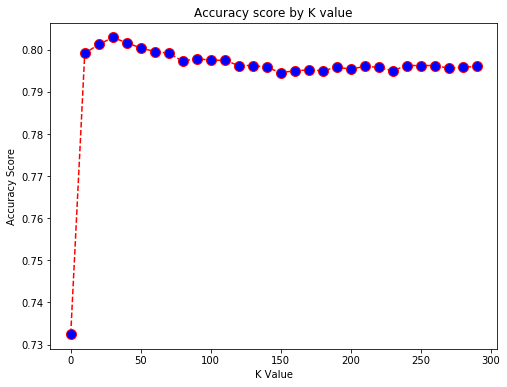

In [66]:
plt.figure(figsize = (8,6))
plt.plot(list(range(0,300,10)), k_scores, color = 'red', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy score by K value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.show()

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [49]:
logreg = LogisticRegression(class_weight = "balanced", penalty = 'l2')

In [194]:
import copy
import statsmodels as sm
logreg_x_tr = copy.deepcopy(x_train)
logreg_x_te = copy.deepcopy(x_test)

logreg.fit(logreg_x_tr, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
logreg_pred = logreg.predict(logreg_x_te)

In [196]:
print(logreg.score(logreg_x_tr, y_train))
print(logreg.score(logreg_x_te, y_test))

0.6703021813087853
0.6904166666666667


In [197]:
prob = logreg.predict_proba(x_train)


In [198]:
accuracy_score(y_test, logreg_pred)

0.6904166666666667

In [199]:
f1_score(y_test, logreg_pred)

0.4840277777777778

# Tree

# Random forest

## Libraries for random forest classification tree

In [55]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [57]:
x_train.shape

(19199, 23)

In [52]:
# find the best n_estimators using learning rate

score=[]
for i in range(0,200,10):
    rf= RandomForestClassifier(n_estimators=i+1,random_state=666)
    scores=cross_val_score(rf,X_train,y_train,cv=10).mean()
    score.append(scores)

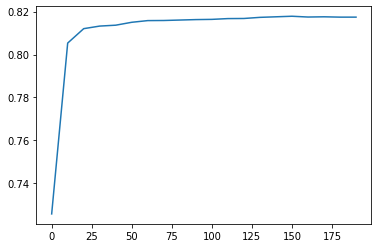

In [67]:
plt.plot(list(range(0,200,10)),score)

In [57]:
print("Max Score: {}".format(max(score)))

Max Score: 0.8178540162093142


In [77]:
print("Range of n_estimators : {}".format(score.index(max(score))*10+1))

Range of n_estimators : 151


In [78]:
score2=[]
for i in range(140, 170):
    rf= RandomForestClassifier(n_estimators=i+1,random_state=666)
    scores=cross_val_score(rf,X_train,y_train,cv=10).mean()
    score2.append(scores)

In [82]:
print("Max Score: {}".format(max(score2)))
print("Range of n_estimators : {}".format(140+score2.index(max(score2))))


Max Score: 0.8179061537113634
Range of n_estimators : 166


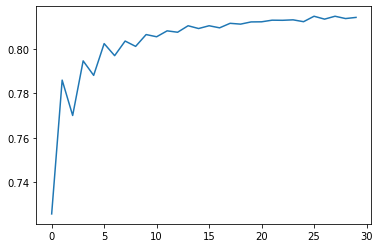

In [65]:
plt.plot(list(range(0,30)),score2)

## Gridsearch for optimal parameters

In [62]:
grid_params={#verbose: 1,
             'max_depth': list(range(0,30)),
#              min_samples_split: ,
#              min_samples_leaf: ,
#              min_weight_fraction_leaf: ,
#              max_features: ,
#              max_leaf_nodes: ,
#              min_impurity_decrease: ,
            }

In [77]:
rf= RandomForestClassifier(n_estimators = 166,max_depth= 8, random_state=666)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)


0.8415542476170634

In [78]:
rf.score(x_test, y_test)

0.8108333333333333

In [70]:
gs=GridSearchCV(estimator = rf, param_grid = grid_params, scoring = 'accuracy', n_jobs = -1, 
                cv = 15, verbose = 1)
gs.fit(x_train, y_train)

Fitting 15 folds for each of 30 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 20.8min finished


GridSearchCV(cv=15, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=166, n_jobs=None,
                                              oob_score=False, random_state=666,
                                

In [71]:
gs.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=15, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=166, n_jobs=None,
                                              oob_score=False, random_s

In [72]:
gs.best_params_

{'max_depth': 8}

In [74]:
gs.best_score_

0.8224381026843888

# Bagged Random Forest Model

In [83]:
# find range of best number of estimators
score3=[]
for i in range(0,200,10):
    bagged_forest= BaggingClassifier(n_estimators=i+1,random_state=666)
    scores=cross_val_score(bagged_forest,x_train,y_train,cv=10).mean()
    score3.append(scores)

In [88]:
max(score3)

In [93]:
print('Range of best n_estimators: {}'.format(score3.index(max(score3))*10+1))

Range of best n_estimators: 181


In [81]:
# find more specific number
score4=[]
for i in range(171,192):
    bagged_forest= BaggingClassifier(n_estimators=i,random_state=666)
    scores=cross_val_score(bagged_forest,x_train,y_train,cv=10).mean()
    score4.append(scores)

In [82]:
max(score4)

0.8167087621591106

In [84]:
score4.index(max(score4))+171

184

In [179]:
brf = BaggingClassifier(n_estimators=184,random_state=666)
brf.fit(x_train, y_train)
brf_pred = brf.predict(x_test)

In [180]:
f1_score(y_test, brf_pred)

0.4847826086956522

In [91]:
accuracy_score(y_test, brf_pred)

0.8104166666666667

In [162]:
# find best max depth
score5=[]
for i in np.arange(0.4,1,0.1):
    bagged_forest= BaggingClassifier(n_estimators=184,random_state=666, max_features = i, n_jobs = -1)
    scores=cross_val_score(bagged_forest,x_train,y_train,cv=10, verbose = 1).mean()
    score5.append(scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.0min finished


In [163]:
max(score5)

0.9475687470651215

In [165]:
score5

[0.9475687470651215,
 0.9463012465129026,
 0.9456007350459938,
 0.9438996009566007,
 0.9439663677085157,
 0.9436328453714058]

In [175]:
brf = BaggingClassifier(n_estimators = 184, random_state = 666, max_features = .4)

In [176]:
brf.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=0.4, max_samples=1.0, n_estimators=184,
                  n_jobs=None, oob_score=False, random_state=666, verbose=0,
                  warm_start=False)

In [177]:
brf_pred = brf.predict(x_test)

In [178]:
brf_f1 = f1_score(y_test, brf_pred)
brf_f1

0.44545973729297544

# XGBoost

In [166]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [167]:
boost_tree = xgb.XGBClassifier(objective = 'binary:logistic')

In [ ]:
boost_params = {'n_estimators': #[100,300,500],
              'learning_rate': #[0.07,0.05,0.03,0.01],
              'max_depth': #[3, 4, 5, 6, 7],
              'colsample_bytree': #[0.5,0.45,0.4],
              'min_child_weight': #[1, 2, 3]
               }

In [170]:
gs_xgb = GridSearchCV(boost_tree, x_train, y_train, scoring = 'f1', n_jobs = -1, 
                      cv = 15, verbose = 1)

TypeError: __init__() got multiple values for argument 'scoring'

In [200]:
score6 = []
for i in range(1000,2200,200):
    gradient_boosted = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = i)
    score = cross_val_score(estimator = gradient_boosted, X = x_train, y = y_train, scoring = 'f1', n_jobs = -1,
                           cv = 10, verbose = 1).mean()
    score6.append(score)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  7.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  9.4min finished


In [190]:
for i in score6:
    print(i.mean())

0.0
0.684454039027979
0.6986419288033915
0.7073167992175277
0.7139154573396189
0.7216604044818491


In [192]:
score6

[0.7265682311193098,
 0.7389893195876917,
 0.7484929351738048,
 0.7584996764211736,
 0.7668172518601895,
 0.7751169769826852,
 0.7842266210891344]

In [201]:
score6

[0.7913607475096517,
 0.803136935957558,
 0.8146375817745752,
 0.8251906158824929,
 0.8331730896004957,
 0.8409499069576295]

In [215]:
gradient_boosted = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 2200)
gradient_boosted.fit(x_train,y_train)
gradient_pred = gradient_boosted.predict(x_test)

In [216]:
f1_score(gradient_pred, y_test)

0.5155517682147421

In [225]:
rf_preds = pd.read_csv('RandomForestmodelprediction.csv', header = None)

In [227]:
accuracy_score(rf_preds, gradient_pred)

ValueError: Found input variables with inconsistent numbers of samples: [6002, 4800]

In [ ]:
gb_model = xgb(XGBClassifier(objective = 'binary:logistic', n_estimat))

In [ ]:
pd.to_csv()

# "Final" Model